<a href="https://colab.research.google.com/github/lazybuttrying/TensorFlow-Certificate/blob/main/C3/W4/assignment/C3_W4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

1.   항목 추가
2.   항목 추가

Using LSTMs, see if you can write Shakespeare!


In [ ]:
#!pip install tensorflow==2.5.0



In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 33.7MB/s]


In [33]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # 1000으로 시작하니 accuracy가 0.009부터 시작..
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100)) # and만 계속 나옴 -> 그냥 LSTM으로 적용해보자
model.add(Dense(total_words//2, activation='relu', kernel_regularizer='l1'))
model.add(Dense(total_words))
# Pick an optimizer
adam = Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])
### END CODE HERE
    
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 10, 300)           301200    
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 300)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_18 (Dense)             (None, 1605)              162105    
_________________________________________________________________
dense_19 (Dense)             (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
___________________________________________

In [37]:
 import tensorflow as tf
 class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.09):
          print("\n Reached 98% Accuracy So cancelling training")
          self.model.stop_training = True
 
 history = model.fit(predictors, label, epochs=100, verbose=1, callbacks=[myCallback()])  # 0.0217이 최선인가봐..

Epoch 1/100
484/484 [==============================] - 11s 24ms/step - loss: 18.5397 - accuracy: 0.0217
Epoch 2/100
484/484 [==============================] - 11s 23ms/step - loss: 19.1793 - accuracy: 0.0217
Epoch 3/100
484/484 [==============================] - 11s 23ms/step - loss: 13.1112 - accuracy: 0.0217
Epoch 4/100
484/484 [==============================] - 11s 23ms/step - loss: 17.6121 - accuracy: 0.0217
Epoch 5/100
484/484 [==============================] - 11s 23ms/step - loss: 15.5613 - accuracy: 0.0217
Epoch 6/100
484/484 [==============================] - 11s 23ms/step - loss: 15.1291 - accuracy: 0.0217
Epoch 7/100
484/484 [==============================] - 11s 24ms/step - loss: 15.0180 - accuracy: 0.0208
Epoch 8/100
484/484 [==============================] - 11s 23ms/step - loss: 14.7376 - accuracy: 0.0217
Epoch 9/100
484/484 [==============================] - 11s 23ms/step - loss: 14.2111 - accuracy: 0.0207
Epoch 10/100
484/484 [==============================] - 11s 23ms

KeyboardInterrupt: ignored

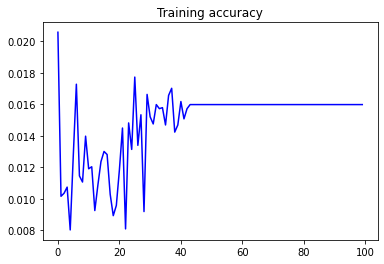

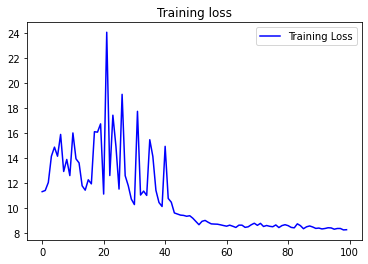

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [14]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	classes = np.argmax(predicted,axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == classes:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and


In [40]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100)) 
model.add(Dense(total_words//2, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # 0.0217에서 벋어나기 위해 l2에서 hyperparameter 조절
model.add(Dense(total_words))
# Pick an optimizer
adam = Adam(learning_rate=0.01) # 이걸 l2-0.01 과 함께하니 0.023에서 갇혔다...
# 답지는 adam 조정 없이 하니 10단계마다 0.01씩 오르는 기적을 보인다
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])
### END CODE HERE
    
print(model.summary())

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.09):
          print("\n Reached 98% Accuracy So cancelling training")
          self.model.stop_training = True
 
history = model.fit(predictors, label, epochs=100, verbose=1, callbacks=[myCallback()])  

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 10, 300)           301200    
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 300)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_20 (Dense)             (None, 1605)              162105    
_________________________________________________________________
dense_21 (Dense)             (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
___________________________________________

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	classes = np.argmax(predicted,axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == classes:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)